In [27]:
from pathlib import Path
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib.request

In [4]:
def load_data():
    file_path = Path("data/housing.csv")
    if not file_path.is_file():
        Path("data").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/RainelDias88/regression/blob/main/data/housing.csv"
        urllib.request.urlretrieve(url, file_path)
    return pd.read_csv(Path("data/housing.csv"))

In [5]:
df = load_data()

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

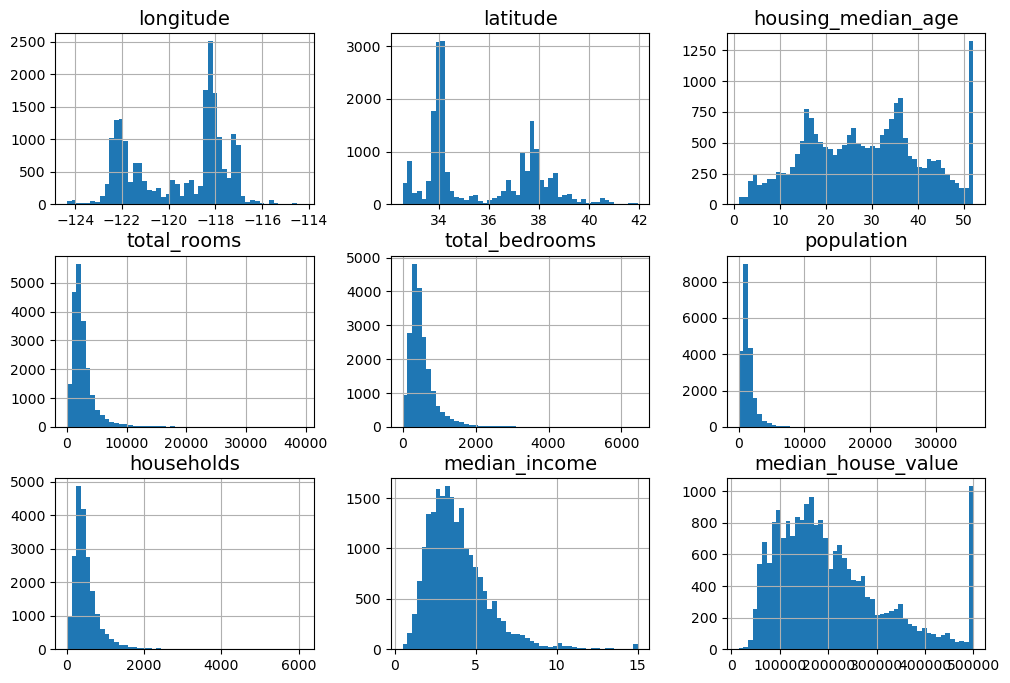

In [13]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [15]:
train_set, set_test = train_test_split(df, test_size=0.2, random_state=42)

In [18]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])                        

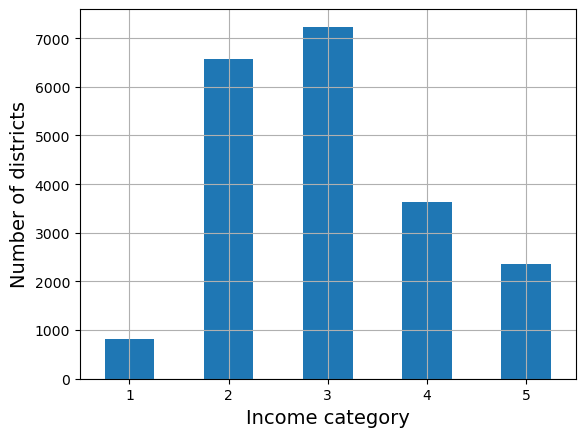

In [25]:
df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [32]:
strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, stratify=df["income_cat"], random_state=42)

In [34]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [68]:
def income_cat_proportions(data):
    return (data["income_cat"].value_counts() / len(data)) * 100

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(df),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set)    
}).sort_index()
compare_props.index.name = "Income category"
compare_props["Strat. Error %"] = ((compare_props["Stratified %"] / compare_props["Overall %"] - 1) * 100)
compare_props["Rand. Error %"] = ((compare_props["Random %"] / compare_props["Overall %"] - 1) * 100)

compare_props = compare_props.round(2)

In [69]:
compare_props

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income category,,,,,
1,3.98,4.00,4.02,0.36,0.97
2,31.88,31.88,32.44,-0.02,1.73
3,35.06,35.05,35.85,-0.01,2.27
4,17.63,17.64,16.74,0.03,-5.06
5,11.44,11.43,10.95,-0.08,-4.32


In [71]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [72]:
df = strat_train_set.copy()

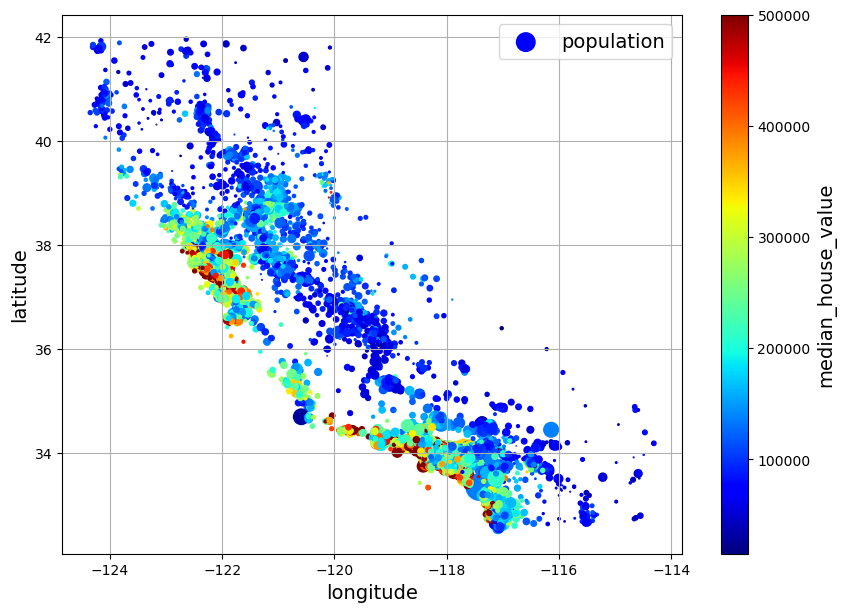

In [88]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=df["population"] / 100, label="population",
       c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10, 7))
california_image = plt

plt.show()